In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ler o arquivo
df_exames = pd.read_csv('datasets/exame.csv')

In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [5]:
# Transformação de Features
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [6]:
# Remover a coluna id_paciente
df_exames.drop(columns = ['id_paciente'],inplace = True)

In [7]:
df_exames

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
...,...,...,...,...,...
95,F,52,96,183,89
96,F,68,108,169,105
97,M,21,95,154,125
98,M,41,109,173,128


In [8]:
# Lidando com variáveis categóricas - Gênero
# One-Hot Encoding
df_exames = pd.get_dummies(df_exames, columns = ['genero'],dtype = 'int64')

In [9]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


In [10]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


<Axes: >

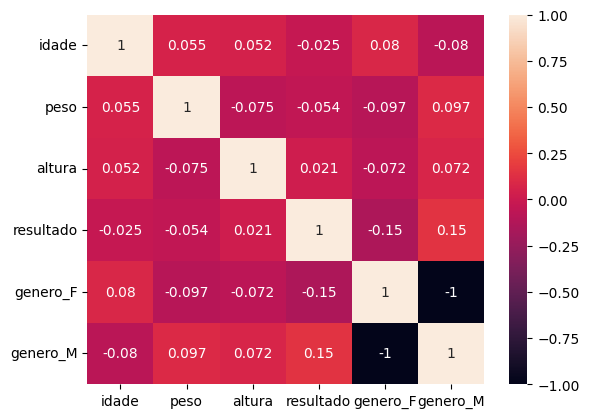

In [11]:
# Apresentar o Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(),vmin = -1, vmax = 1,annot = True)

<Axes: >

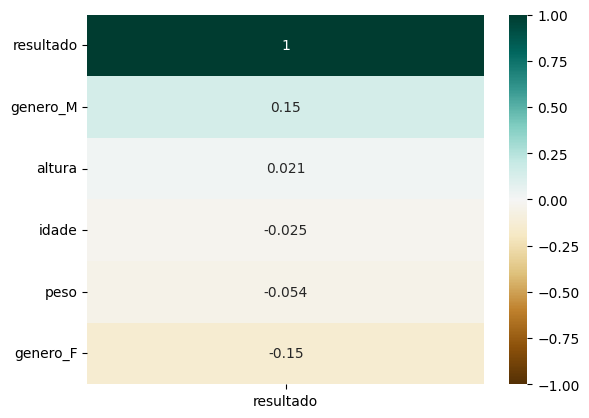

In [12]:
# Mapa de Correlação apenas com a variável Target
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado',ascending = False),vmin = -1,vmax=1,annot =  True,
           cmap = 'BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


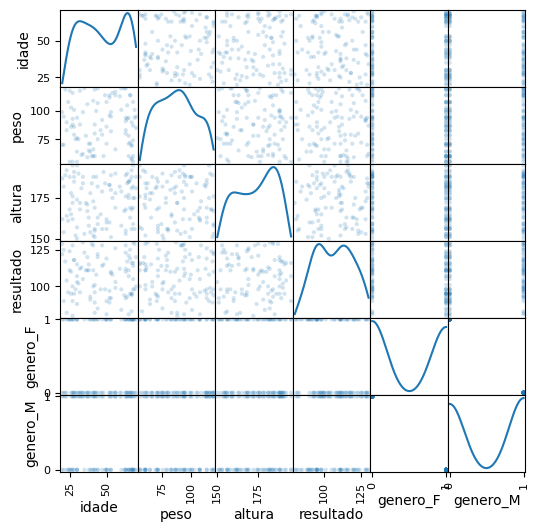

In [13]:
import scipy
# Plot Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha =0.2, figsize = (6,6), diagonal = 'kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

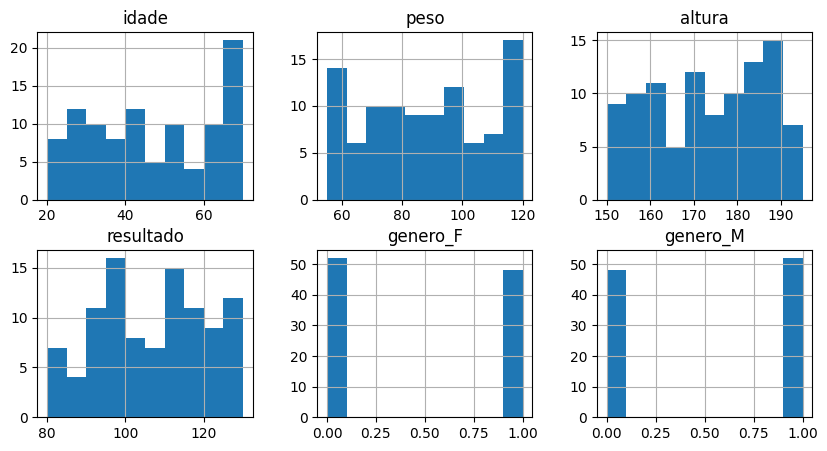

In [14]:
# Histograma de Todas as variáveis
df_exames.hist(layout = (2,3), figsize = (10,5))

In [15]:
# Criar uma Feature Nova - IMC
df_exames['IMC'] = df_exames['peso']/ (df_exames['altura']/100)**2

In [16]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,IMC
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [17]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   IMC        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


<Axes: >

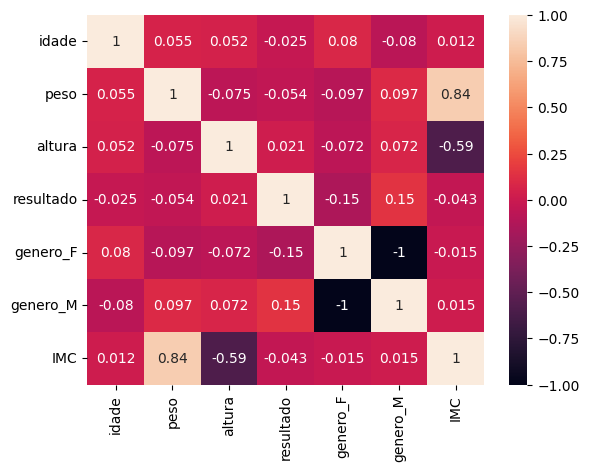

In [18]:
# Apresentar o Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(),vmin = -1, vmax = 1,annot = True)

<Axes: >

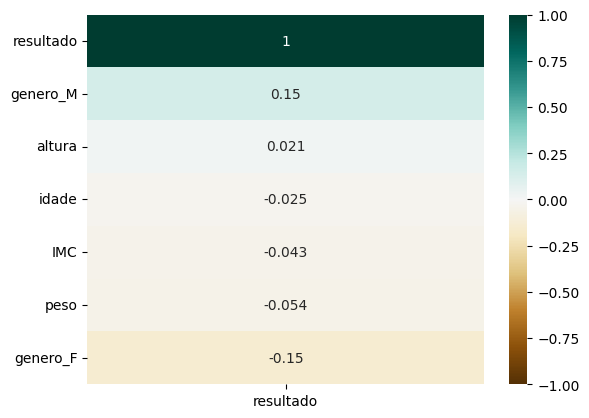

In [19]:
# Mapa de Correlação apenas com a variável Target
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado',ascending = False),vmin = -1,vmax=1,annot =  True,
           cmap = 'BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='IMC', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='IMC', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

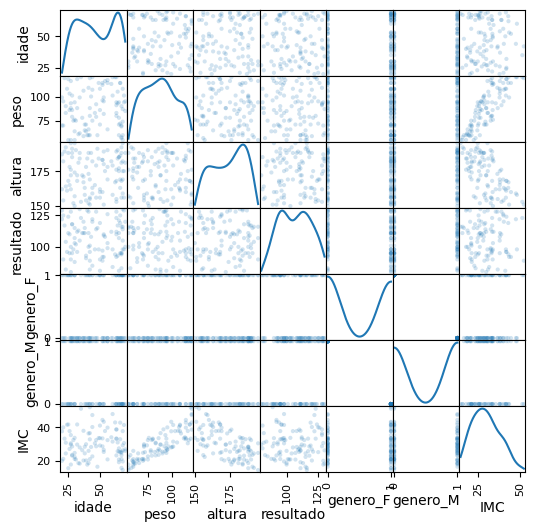

In [20]:
import scipy
# Plot Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha =0.2, figsize = (6,6), diagonal = 'kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'IMC'}>, <Axes: >]], dtype=object)

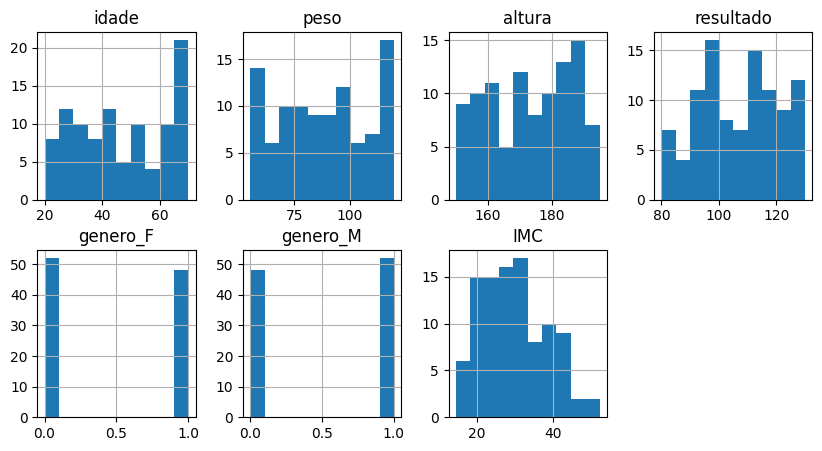

In [21]:
# Histograma de Todas as variáveis
df_exames.hist(layout = (2,4), figsize = (10,5))

In [23]:
dict_regressao = {
    'tempo_casa': [1,3,6,9,10,14,18],
    'salario':[ 1500,3000,4500,6000,7000,8500,10000]
}
df_regressao_simples = pd.DataFrame(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

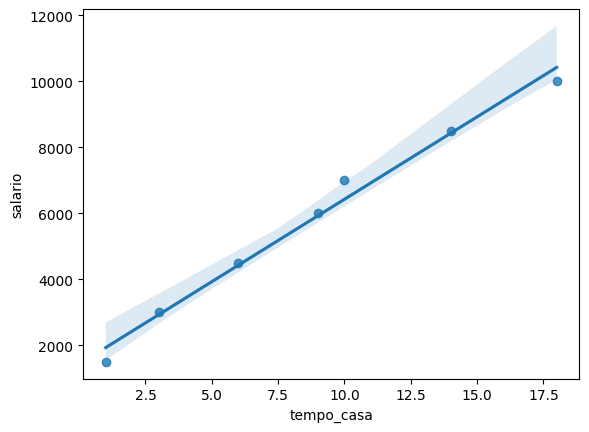

In [25]:
sns.regplot(data=df_regressao_simples, x = 'tempo_casa', y ='salario' )

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [28]:
# Modelo 1 - Sem IMC
X = df_exames.drop(columns = ['IMC', 'resultado'])
y = df_exames['resultado']

In [30]:
# Dividir Conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 51)

In [31]:
len(X_train)

70

In [32]:
# Treinar o algoritmo de Regressão Linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [33]:
# Gerar Predições do Conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)

In [38]:
# Equação da Reta - Regressão Linear
# y = ax + b
print(f"a: {list(model_1.coef_)}, \nb: {model_1.intercept_}")

a: [-0.006948163997999758, -0.07881980319669768, 0.10991808411691972, -2.9691311182400284, 2.9691311182400284], 
b: 94.21133142019875


In [40]:
# R² Score - Quanto mais próximo de 1, melhor. ]-inf, 1]
# Conjunto de Treino
model_1.score(X_train, y_train)

0.06218388634297267

In [41]:
# Conjunto de Teste
model_1.score(X_test, y_test)

-0.1364090447910642

In [42]:
r2_score(y_test, y_pred)

-0.1364090447910642

In [43]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [44]:
# Segundo Modelo - Apenas IMC
X = pd.DataFrame(df_exames['IMC'])
y = df_exames['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 51)

In [45]:
model_2 = LinearRegression().fit(X_train,y_train)

In [46]:
y_pred = model_2.predict(X_test)

In [48]:
print(f"a: {list(model_2.coef_)}, \nb: {model_2.intercept_}")

a: [-0.21677588610714363], 
b: 112.15019229088837


In [49]:
model_2.score(X_train,y_train)

0.015285962664806862

In [50]:
model_2.score(X_test,y_test)

-0.08898328562401758

In [51]:
# MAE
mean_absolute_error(y_test, y_pred)

12.5056514070601

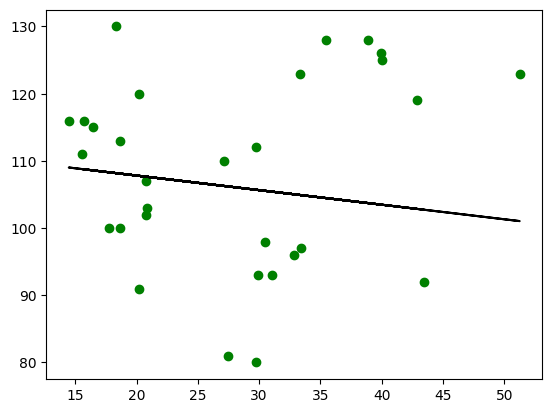

In [53]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X_test, y_pred, color = 'k')